### Installing Dependencies

In [2]:
from os import environ
environ['KERAS_BACKEND'] = 'plaidml.keras.backend'
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Using plaidml.keras.backend backend.


### Loading and Formatting the Data

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
num_classes = 10
input_shape = (28, 28, 1)
x_train, x_test = x_train.astype("float32") / 255, x_test.astype("float32") / 255

x_train, x_test = np.expand_dims(x_train, -1), np.expand_dims(x_test, -1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Building CNN

In [7]:
model = keras.Sequential()
model(keras.Input(shape=input_shape))
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_classes, activation='softmax'))

### Compiling and Training the Model

In [8]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 20s 340us/step - loss: 0.1764 - acc: 0.9459
Epoch 2/15
60000/60000 [==============================] - 13s 209us/step - loss: 0.0678 - acc: 0.9792
Epoch 3/15
60000/60000 [==============================] - 13s 209us/step - loss: 0.0534 - acc: 0.9832
Epoch 4/15
60000/60000 [==============================] - 13s 208us/step - loss: 0.0433 - acc: 0.9865
Epoch 5/15
60000/60000 [==============================] - 13s 209us/step - loss: 0.0389 - acc: 0.9878
Epoch 6/15
60000/60000 [==============================] - 13s 208us/step - loss: 0.0356 - acc: 0.9883
Epoch 7/15
60000/60000 [==============================] - 13s 209us/step - loss: 0.0308 - acc: 0.9904
Epoch 8/15
60000/60000 [==============================] - 12s 208us/step - loss: 0.0290 - acc: 0.9905
Epoch 9/15
60000/60000 [==============================] - 13s 209us/step - loss: 0.0268 - acc: 0.9913
Epoch 10/15
60000/60000 [==============================] - 13s 209us/step - loss: 

### Evaluating the Model

In [9]:
score = model.evaluate(x_test, y_test)
print("Accuracy:", score[1])
print("Loss:", score[0])

10000/10000 [==============================] - 7s 700us/step
Accuracy: 0.993
Loss: 0.024440516277402638


### Testing the Model

In [10]:
y_predicted = model.predict(x_test, verbose=1)
y_predicted = np.argmax(y_predicted, axis=1)

10000/10000 [==============================] - 4s 415us/step


### Inspecting the Model with Confusion Matrix

Text(114.0, 0.5, 'Truth')

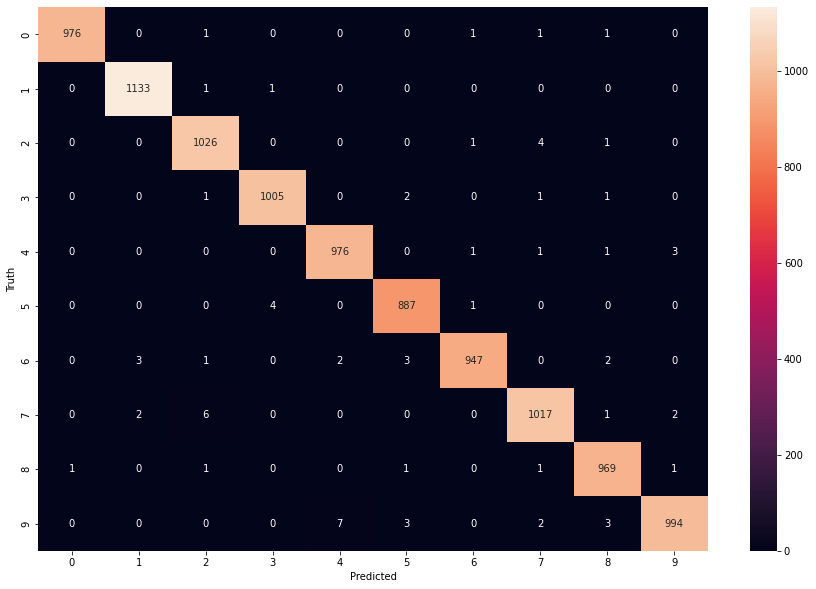

In [11]:
import seaborn as sn
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_predicted)
plt.figure(figsize = (15,10))
sn.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')